<a href="https://colab.research.google.com/github/pedromperezc/CEIA/blob/master/AP/Defafio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

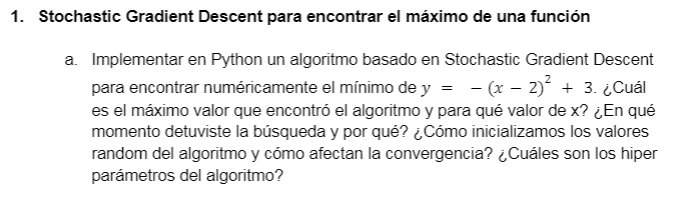

In [1]:
import pandas as pk
import numpy as np
import matplotlib.pyplot as plt

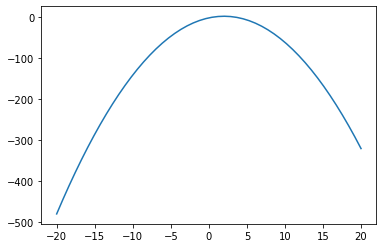

In [19]:
# Creo algunos puntos para poder visualizar la función.
X = np.linspace(-20,20,50)
y = -1* (X-2)**2 + 3
plt.plot(X, y)

In [24]:
v = -20
lr=0.01
pasos = []
epoch = 1000
for i in range(epoch):
  gradient = -2 * v + 4
  if gradient < 0.01:
    print("Early stop at :", i)
    break
  else:
    
    diff = lr * gradient
    v += diff
    pasos.append(v)
plt.show()

Early stop at : 416


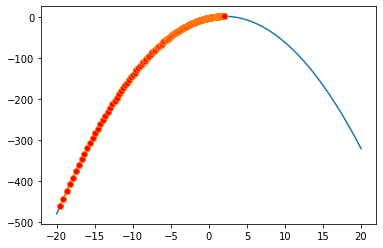

In [25]:
pasos_y = -1* (np.array(pasos)-2)**2 + 3
plt.plot(X, y)
plt.plot(pasos, pasos_y, marker="o", markerfacecolor="r")
plt.show()

¿Cuál es el máximo valor que encontró el algoritmo y para qué valor de X?

In [26]:
# Utilizando un learning rate de 0.01 y 100 Epoch se logro de 1.99.
pasos[-1]

1.9950742749195114

¿En qué momento detuviste la búsqueda y por qué?

- La búsqueda se detuvo en 416 epoch ya que el gradiente alcanzo el valor minímo de 0.01

¿Cómo inicializamos los valores random del algoritmo y cómo afectan la convergencia?

- El valor se inicio arbitraríamente en -20, a medida que me encuentro más lejos del valor optimo voy a necesita más pasos.

¿Cuáles son los hiper parámetros del algoritmo?

- El learning rate.
- El valor inicial de x
- el número de epoch o criterio de early stop.

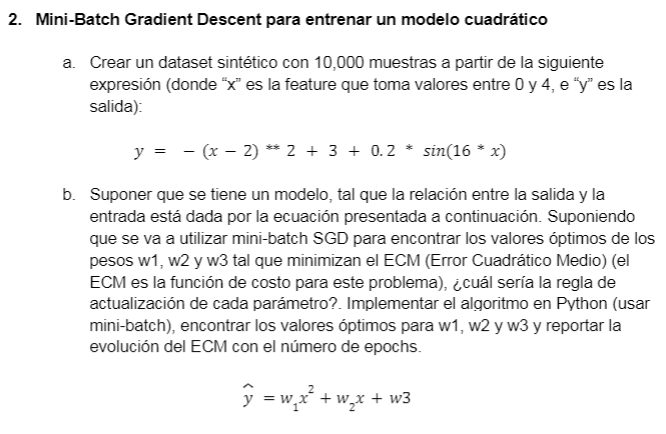

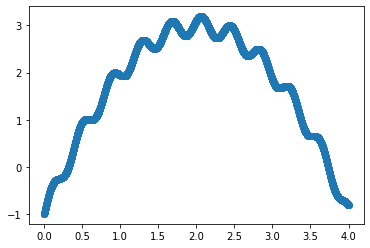

In [9]:
# a. Dataset sintetico:
X = np.linspace(0,4,10000)
y =-1*(X-2)**2 + 3 + 0.2 * np.sin(16 * X)
plt.scatter(X, y)

In [10]:
# b. Mini-batch SGD:

def mini_batch_gradient_descent(batch_size, lr, epoch):
  m1 = np.random.rand(1)
  m2 = np.random.rand(1)
  m3 = np.random.rand(1)

  for e in range(epoch):
    error = 0
    for i in range(0, len(X), batch_size):
      end = i + batch_size if i + batch_size <= len(X) else len(X)
      batch_X = X[i: end]
      batch_y = y[i: end]
      Y_p = m1*batch_X**2 + m2*batch_X + m3

      error = error + np.sum(np.square(batch_y - Y_p))
      d_m1 = np.sum((-2 * ((batch_y - Y_p)) * batch_X**2))/batch_size
      d_m2 = np.sum((-2 * ((batch_y - Y_p)) * batch_X))/batch_size
      d_m3 = np.sum(-2 * ((batch_y - Y_p)))/batch_size
      m1 = m1 - lr * d_m1
      m2 = m2 - lr * d_m2
      m3 = m3 - lr * d_m3
    mse.append(error/batch_size)

  fig = plt.figure(figsize=(8,5))
  ax = plt.axes()
  ax.set_title("Mean Square error")
  ax.set_xlabel("Número de epoch")
  ax.set_ylabel("MSE")
  ax.plot(mse)
  return m1,m2,m3

(array([-0.82646874]), array([2.91166218]), array([0.0188202]))

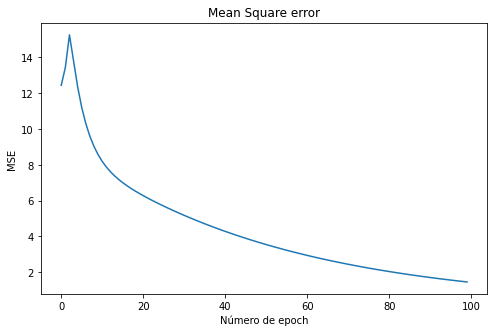

In [11]:
batch_size = 1000
lr = 0.01
mse = []
epoch = 100
m1, m2, m3 = mini_batch_gradient_descent(batch_size, lr, epoch)
m1,m2,m3

(array([-0.9448615]), array([3.79918931]), array([-0.88322001]))

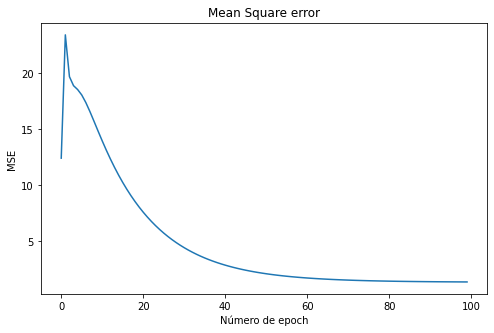

In [12]:
batch_size = 100
lr = 0.01
mse = []
epoch = 100
m1, m2, m3 = mini_batch_gradient_descent(batch_size, lr, epoch)
m1, m2, m3

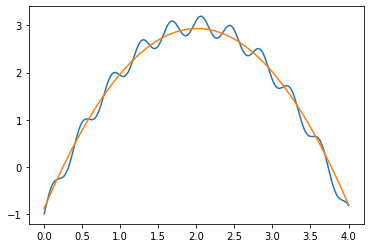

In [13]:
X = np.linspace(0,4,10000)
X_2 = np.linspace(0,4,100)
y_p = m1*X_2*X_2 + m2*X_2  + m3

plt.plot(X, y)
plt.plot(X_2, y_p)
plt.show()